In [88]:
#Import everything
import pandas as pd

In [89]:
import json
from pandas.io.json import json_normalize

In [90]:
wb = pd.read_json('world_bank_projects.json')

In [91]:
#Sample data
wb.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [92]:
#Problem 1: Find the top 10 countries with the most projects.
#Filter the data
p1 = wb.groupby('countryname').size()

In [93]:
p1 = p1.sort_values(ascending=False)

In [94]:
#Inspect the data
p1.head(11)

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Burkina Faso                        9
dtype: int64

In [95]:
#Africa is a continent, not a country, and should be dropped from the data set.
p1.drop('Africa')

countryname
People's Republic of China       19
Republic of Indonesia            19
Socialist Republic of Vietnam    17
Republic of India                16
Republic of Yemen                13
                                 ..
Republic of Costa Rica            1
Republic of Congo                 1
Republic of Belarus               1
Republic of Cape Verde            1
Republic of Poland                1
Length: 117, dtype: int64

In [96]:
p1 = pd.DataFrame(p1)

In [97]:
p1.columns = ['Projects per country']

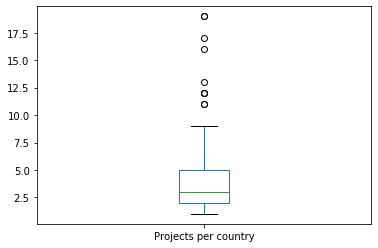

In [98]:
#We see that most countries have less than ten world bank projects, but most of the top ten are outliers.
#We can graph this with a box plot to see how much these countries differ from the norm
p1.plot(kind = 'box')

In [137]:
#Project 2: Find the top ten major project themes

In [145]:
#Filter the data
p2 = wb['mjtheme_namecode']

In [175]:
#Inspect the data
p2[2]

[{'code': '5', 'name': 'Trade and integration'},
 {'code': '2', 'name': 'Public sector governance'},
 {'code': '11', 'name': 'Environment and natural resources management'},
 {'code': '6', 'name': 'Social protection and risk management'}]

In [176]:
#Each entry is a list of dictionaries. We need a loop to total everything up.

In [177]:
roughcount = {}
for proj in p2:
    for projtype in proj:
        if projtype['name'] in roughcount:
            roughcount[projtype['name']] += 1
        else:
            roughcount[projtype['name']] = 1

In [178]:
projectCount = pd.DataFrame(list(roughcount.items()), columns = ['projectType', 'projectCount'])

In [179]:
#The data is ready to be visualized. We can see that environment and natural resources management is the most common
#type of project, and rule of law is the least common.
#The blank column is data where the name field was left blank. Codes are still present for this data. We can rewrite
#the loop to take this into account.
projectCount.set_index('projectType').sort_values('projectCount', ascending = False)

,projectCount
projectType,
Environment and natural resources management,223
Rural development,202
Human development,197
Public sector governance,184
Social protection and risk management,158
Financial and private sector development,130
,122
Social dev/gender/inclusion,119
Trade and integration,72


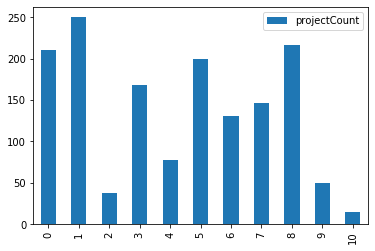

In [202]:
#Here's the unfinished plot with the blank data:
projectCount.plot(kind = 'bar')

In [182]:
#Problem 3: Fill in the missing data. We begin by finding what the codes match to.
#Build a dictionary containing the meaning of all the codes
codekey = {}
for proj in p2:
    for projtype in proj:
        if (projtype['name'] != '') & ~(projtype['code'] in codekey):
            codekey[projtype['code']] = projtype['name']

In [184]:
#Now we revise the for loop to check codekey for the meanings of the codes.
roughcount = {}
for proj in p2:
    for projtype in proj:
        if codekey[projtype['code']] in roughcount:
            roughcount[codekey[projtype['code']]] += 1
        else:
            roughcount[codekey[projtype['code']]] = 1

In [185]:
#Our data set is complete.
roughcount

{'Human development': 210,
 'Environment and natural resources management': 250,
 'Economic management': 38,
 'Social protection and risk management': 168,
 'Trade and integration': 77,
 'Public sector governance': 199,
 'Social dev/gender/inclusion': 130,
 'Financial and private sector development': 146,
 'Rural development': 216,
 'Urban development': 50,
 'Rule of law': 15}

In [192]:
projectCount = pd.DataFrame(list(roughcount.items()), columns = ['projectType', 'projectCount'])

In [194]:
#We now have all the data we need to make a graph
projectCount.set_index('projectType').sort_values('projectCount', ascending = False)

,projectCount
projectType,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


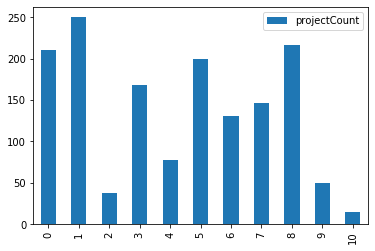

In [201]:
projectCount.plot(kind = 'bar')

In [ ]:
#Another solution would be to check the data set for the meaning of missing codes or even build codekey as we go.
#This solution is slower but easier to understand and preserves the codekey dictionary for later use.